In [6]:
import sklearn
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
import pandas as pd

import numpy as np

from time import time
import scipy.stats as stats
#from scipy.stats import loguniform



from sklearn import tree
import graphviz

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
def build_pipeline(model = DecisionTreeClassifier(random_state=0, criterion='gini')):
    return Pipeline(([
        ('vect',CountVectorizer()),
        ('tfidf',TfidfTransformer(use_idf= True)),
        ('clf',model),
    ]))
testdata=sklearn.datasets.fetch_20newsgroups(data_home=None, subset='test', categories=None, shuffle=True, random_state=42, remove=(['headers', 'footers', 'quotes']), download_if_missing=True)
data=sklearn.datasets.fetch_20newsgroups(data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(['headers', 'footers', 'quotes']), download_if_missing=True)


In [8]:

ada=build_pipeline(model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators = 600, learning_rate=1,algorithm='SAMME',random_state=0))
dt=build_pipeline(DecisionTreeClassifier(splitter='random',class_weight='balanced',min_samples_leaf=1,min_samples_split=50,max_depth=200))


ada.fit(data.data,data.target)
dt.fit(data.data,data.target)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='gini', max_depth=200,
                                        ma

In [9]:
dot_data = tree.export_graphviz(dt['clf'], out_file=None, 
...                      feature_names=dt['vect'].get_feature_names(),  
...                      class_names=data.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
>>> graph = graphviz.Source(dot_data)  


In [103]:
ada

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                    base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=2,
                                                                

In [113]:
graph

CalledProcessError: Command '['dot', '-Tsvg']' died with <Signals.SIGKILL: 9>.

In [132]:
C

array([[157,   1,   1,   7,   4,   1,   1,   3,   6,   5,   3,   6,   5,
         24,   9,  12,  10,  34,   8,  35],
       [  1, 179,  20,  16,  12,  34,   8,   6,   3,   4,   1,   9,  18,
         17,  18,   2,   1,   2,   4,   4],
       [  0,  22, 234,  32,   9,  47,   6,  13,   2,   4,   2,   9,  22,
          4,   7,   2,   3,   0,   3,   2],
       [  3,  27,  48, 178,  32,  17,  16,  16,   3,   3,   2,   4,  41,
         11,   2,   4,   5,   1,   5,   1],
       [  4,  26,   7,  19, 220,  12,  16,   2,   2,   5,   5,   8,  13,
         12,   4,   0,   6,   1,   0,   3],
       [  1,  39,  34,  25,  10, 212,   2,   3,   5,   3,   1,   2,  20,
         11,   5,   6,   0,   4,   2,   3],
       [  4,  14,   8,  19,  18,   7, 290,   9,   7,   6,   3,   4,  10,
          3,   2,   3,   8,   1,   1,   0],
       [  5,  10,   8,  18,  11,   9,  11, 240,  18,  10,   4,   4,  36,
         24,  23,  11,  12,  10,  14,   9],
       [  0,   2,   0,   0,   6,   0,   6,  12, 293,   1,   5,  

In [130]:
C.sum(axis=0)

array([319, 389, 394, 392, 385, 395, 390, 396, 398, 397, 399, 396, 393,
       396, 394, 398, 364, 376, 310, 251])

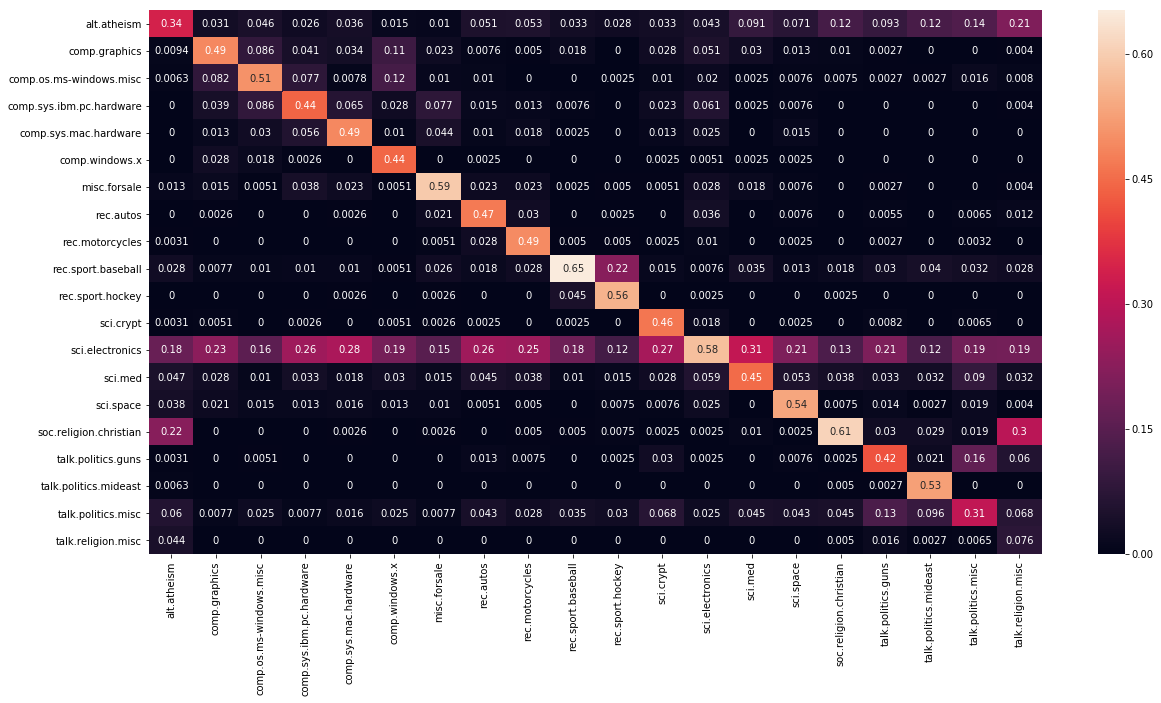

In [12]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
def confusionm(model,testdata,title):
    array = confusion_matrix(model.predict(testdata.data),testdata.target)
    C=array
    array=C / C.astype(np.float).sum(axis=0)
    df_cm = pd.DataFrame(array, index = data.target_names,
                      columns = testdata.target_names)
    plt.figure(figsize = (20,10))
    sn.heatmap(df_cm, annot=True)
confusionm(ada,testdata,'Adaboost')

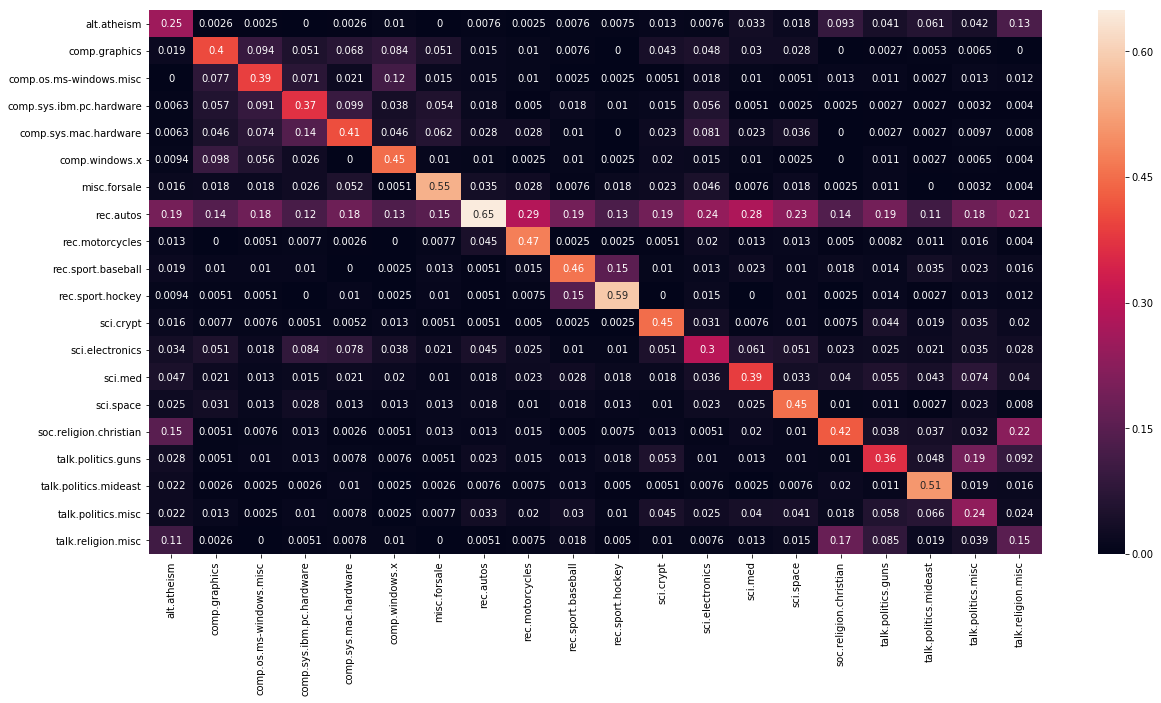

In [11]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = confusion_matrix(dt.predict(testdata.data),testdata.target)
C=array
array=C / C.astype(np.float).sum(axis=0)
df_cm = pd.DataFrame(array, index = data.target_names,
                  columns = data.target_names)
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)